# TensorFlow基础

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## 数据类型

### 数值类型

标量在 TensorFlow 是如何创建的

In [2]:
# python 语言方式创建标量
a = 1.2 
# TF 方式创建标量
aa = tf.constant(1.2)

type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

如果要使用 TensorFlow 提供的功能函数， 须通过 TensorFlow 规定的方式去创建张量，而不能使用 Python 语言的标准变量创建方式。

In [3]:
x = tf.constant([1,2.,3.3])
# 打印 TF 张量的相关信息                
x

<tf.Tensor: id=1, shape=(3,), dtype=float32, numpy=array([1. , 2. , 3.3], dtype=float32)>

In [4]:
# 将 TF 张量的数据导出为 numpy 数组格式
x.numpy() 

array([1. , 2. , 3.3], dtype=float32)

与标量不同，向量的定义须通过 List 容器传给 tf.constant()函数。

创建一个元素的向量：

In [5]:
# 创建一个元素的向量
a = tf.constant([1.2]) 
a, a.shape

(<tf.Tensor: id=2, shape=(1,), dtype=float32, numpy=array([1.2], dtype=float32)>,
 TensorShape([1]))

创建 3 个元素的向量：

In [6]:
 # 创建 3 个元素的向量
a = tf.constant([1,2, 3.])
a, a.shape

(<tf.Tensor: id=3, shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>,
 TensorShape([3]))

定义矩阵

In [7]:
# 创建 2 行 2 列的矩阵
a = tf.constant([[1,2],[3,4]]) 
a, a.shape

(<tf.Tensor: id=4, shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]])>, TensorShape([2, 2]))

三维张量可以定义为：

In [8]:
# 创建 3 维张量
tf.constant([[[1,2],[3,4]],[[5,6],[7,8]]]) 

<tf.Tensor: id=5, shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])>

通过传入字符串对象即可创建字符串类型的张量

In [9]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: id=6, shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

### 字符串类型

通过传入字符串对象即可创建字符串类型的张量

In [10]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: id=7, shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

在 tf.strings 模块中，提供了常见的字符串类型的工具函数，如小写化 lower()、 拼接
join()、 长度 length()、 切分 split()等。

In [11]:
# 小写化字符串
tf.strings.lower(a) 

<tf.Tensor: id=8, shape=(), dtype=string, numpy=b'hello, deep learning.'>

### 布尔类型
布尔类型的张量只需要传入 Python 语言的布尔类型数据，转换成 TensorFlow 内部布尔型即可。

In [12]:
# 创建布尔类型标量
tf.constant(True) 

<tf.Tensor: id=9, shape=(), dtype=bool, numpy=True>

创建布尔类型的向量

In [13]:
 # 创建布尔类型向量
tf.constant([True, False])

<tf.Tensor: id=10, shape=(2,), dtype=bool, numpy=array([ True, False])>

需要注意的是， TensorFlow 的布尔类型和 Python 语言的布尔类型并不等价，不能通用

In [14]:
# 创建 TF 布尔张量
a = tf.constant(True) 
# TF 布尔类型张量与 python 布尔类型比较
print(a is True) 
# 仅数值比较
print(a == True) 

False
tf.Tensor(True, shape=(), dtype=bool)


## 数值精度

在创建张量时，可以指定张量的保存精度

In [15]:
# 创建指定精度的张量
tf.constant(123456789, dtype=tf.int16)

<tf.Tensor: id=14, shape=(), dtype=int16, numpy=-13035>

In [16]:
tf.constant(123456789, dtype=tf.int32)

<tf.Tensor: id=15, shape=(), dtype=int32, numpy=123456789>

对于浮点数， 高精度的张量可以表示更精准的数据，例如采用 tf.float32 精度保存π时，实际保存的数据为 3.1415927

In [17]:
import numpy as np
# 从 numpy 中导入 pi 常量
np.pi 
# 32 位
tf.constant(np.pi, dtype=tf.float32) 

<tf.Tensor: id=16, shape=(), dtype=float32, numpy=3.1415927>

如果采用 tf.float64 精度保存π，则能获得更高的精度

In [18]:
tf.constant(np.pi, dtype=tf.float64) # 64 位

<tf.Tensor: id=17, shape=(), dtype=float64, numpy=3.141592653589793>

### 读取精度

通过访问张量的 dtype 成员属性可以判断张量的保存精度

In [19]:
a = tf.constant(np.pi, dtype=tf.float16)

# 读取原有张量的数值精度
print('before:',a.dtype) 
# 如果精度不符合要求，则进行转换
if a.dtype != tf.float32: 
    # tf.cast 函数可以完成精度转换
    a = tf.cast(a,tf.float32) 
# 打印转换后的精度
print('after :',a.dtype) 

before: <dtype: 'float16'>
after : <dtype: 'float32'>


### 类型转换
系统的每个模块使用的数据类型、 数值精度可能各不相同， 对于不符合要求的张量的类型及精度， 需要通过 tf.cast 函数进行转换

In [20]:
# 创建 tf.float16 低精度张量
a = tf.constant(np.pi, dtype=tf.float16) 
# 转换为高精度张量
tf.cast(a, tf.double) 

<tf.Tensor: id=21, shape=(), dtype=float64, numpy=3.140625>

进行类型转换时，需要保证转换操作的合法性， 例如将高精度的张量转换为低精度的张量时，可能发生数据溢出隐患：

In [21]:
a = tf.constant(123456789, dtype=tf.int32)
# 转换为低精度整型
tf.cast(a, tf.int16) 

<tf.Tensor: id=23, shape=(), dtype=int16, numpy=-13035>

布尔类型与整型之间相互转换也是合法的， 是比较常见的操作

In [22]:
a = tf.constant([True, False])
# 布尔类型转整型
tf.cast(a, tf.int32) 

<tf.Tensor: id=25, shape=(2,), dtype=int32, numpy=array([1, 0])>

一般默认 0 表示 False， 1 表示 True，在 TensorFlow 中，将非 0 数字都视为 True，

In [23]:
a = tf.constant([-1, 0, 1, 2])
# 整型转布尔类型
tf.cast(a, tf.bool) 

<tf.Tensor: id=27, shape=(4,), dtype=bool, numpy=array([ True, False,  True,  True])>

## 待优化张量

TensorFlow 增加了一种专门的数据类型来支持梯度信息的记录： tf.Variable。 tf.Variable 类型在普通的张量类型基础上添加了 name， trainable 等属性来支持计算图的构建。

In [24]:
# 创建 TF 张量
a = tf.constant([-1, 0, 1, 2]) 
# 转换为 Variable 类型
aa = tf.Variable(a) 
# Variable 类型张量的属性
aa.name, aa.trainable 

('Variable:0', True)

name 属性用于命名计算图中的变量，这套命名体系是 TensorFlow 内部维护的， 一般不需要用户关注 name 属性；   
trainable属性表征当前张量是否需要被优化，创建 Variable 对象时是默认启用优化标志，可以设置trainable=False 来设置张量不需要优化。

In [25]:
# 直接创建 Variable 张量
tf.Variable([[1,2],[3,4]]) 

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

## 创建张量

### 从数组、列表对象创建

通过 tf.convert_to_tensor 函数可以创建新 Tensor，并将保存在 Python List 对象或者Numpy Array 对象中的数据导入到新 Tensor 中。

In [26]:
# 从列表创建张量
tf.convert_to_tensor([1,2.]) 

<tf.Tensor: id=44, shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [27]:
# 从数组中创建张量
tf.convert_to_tensor(np.array([[1,2.],[3,4]])) 

<tf.Tensor: id=45, shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

### 创建全0或全1张量

In [28]:
# 创建全 0，全 1 的标量
tf.zeros([]),tf.ones([]) 

(<tf.Tensor: id=46, shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: id=47, shape=(), dtype=float32, numpy=1.0>)

In [29]:
# 创建全 0，全 1 的向量
tf.zeros([1]),tf.ones([1]) 

(<tf.Tensor: id=50, shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: id=53, shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)

创建全 0 的矩阵

In [30]:
# 创建全 0 矩阵，指定 shape 为 2 行 2 列
tf.zeros([2,2]) 

<tf.Tensor: id=56, shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

创建全 1 的矩阵

In [31]:
# 创建全 1 矩阵，指定 shape 为 3 行 2 列
tf.ones([3,2]) 

<tf.Tensor: id=59, shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

通过 tf.zeros_like, tf.ones_like 可以方便地新建与某个张量 shape 一致， 且内容为全 0 或全 1 的张量。

In [32]:
# 创建一个矩阵
a = tf.ones([2,3]) 
# 创建一个与 a 形状相同，但是全 0 的新矩阵
tf.zeros_like(a) 

<tf.Tensor: id=63, shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

创建与张量A形状一样的全 1 张量

In [33]:
# 创建一个矩阵
a = tf.zeros([3,2]) 
# 创建一个与 a 形状相同，但是全 1 的新矩阵
tf.ones_like(a) 

<tf.Tensor: id=69, shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

### 创建自定义数值张量

通过 tf.fill(shape, value)可以创建全为自定义数值 value 的张量，形状由 shape 参数指定。

In [34]:
# 创建-1 的标量
tf.fill([], -1) 

<tf.Tensor: id=72, shape=(), dtype=int32, numpy=-1>

In [35]:
# 创建-1 的向量
tf.fill([1], -1) 

<tf.Tensor: id=75, shape=(1,), dtype=int32, numpy=array([-1])>

In [36]:
# 创建 2 行 2 列，元素全为 99 的矩阵
tf.fill([2,2], 99) 

<tf.Tensor: id=78, shape=(2, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99]])>

### 创建已知分布的张量

通过 tf.random.normal(shape, mean=0.0, stddev=1.0)可以创建形状为 shape，均值为mean，标准差为 stddev 的正态分布$\mathcal{N}(mean, stddev^2)$。

In [37]:
# 创建标准正态分布的张量
tf.random.normal([2,2]) 

<tf.Tensor: id=84, shape=(2, 2), dtype=float32, numpy=
array([[0.4479265 , 1.2336508 ],
       [0.96864706, 2.076528  ]], dtype=float32)>

In [38]:
# 创建均值为 1，标准差为 2 的正态分布的张量
tf.random.normal([2,2], mean=1,stddev=2) 

<tf.Tensor: id=90, shape=(2, 2), dtype=float32, numpy=
array([[ 0.06462109,  1.8899262 ],
       [-1.3979323 ,  0.07801807]], dtype=float32)>

通过 tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自[minval, maxval)区间的均匀分布的张量

In [39]:
# 创建采样自[0,1)均匀分布的矩阵
tf.random.uniform([3,2]) 

<tf.Tensor: id=97, shape=(3, 2), dtype=float32, numpy=
array([[0.5197921 , 0.80691314],
       [0.38051474, 0.05250001],
       [0.18329549, 0.8741617 ]], dtype=float32)>

In [40]:
# 创建采样自[0,10)均匀分布的矩阵
tf.random.uniform([2,2],maxval=10) 

<tf.Tensor: id=104, shape=(2, 2), dtype=float32, numpy=
array([[0.4374528 , 7.3671246 ],
       [2.1262336 , 0.12584329]], dtype=float32)>

如果需要均匀采样整形类型的数据，必须指定采样区间的最大值 maxval 参数，同时指定数据类型为 tf.int*型

In [41]:
# 创建采样自[0,100)均匀分布的整型矩阵
tf.random.uniform([2,2],maxval=100,dtype=tf.int32)

<tf.Tensor: id=108, shape=(2, 2), dtype=int32, numpy=
array([[15, 50],
       [38, 84]])>

### 创建序列

tf.range(limit, delta=1)可以创建[0, limit)之间，步长为 delta 的整型序列，不包含 limit 本身。

In [42]:
# 0~10，不包含 10
tf.range(10) 

<tf.Tensor: id=112, shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [43]:
# 创建 0~10，步长为 2 的整形序列
tf.range(10,delta=2)

<tf.Tensor: id=116, shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8])>

In [44]:
tf.range(1,10,delta=2) # 1~10

<tf.Tensor: id=120, shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

## 张量的典型应用

### 标量

In [45]:
# 随机模拟网络输出
out = tf.random.uniform([4,10]) 
# 随机构造样本真实标签
y = tf.constant([2,3,2,0]) 
# one-hot 编码
y = tf.one_hot(y, depth=10) 
# 计算每个样本的 MSE
loss = tf.keras.losses.mse(y, out) 
# 平均 MSE,loss 应是标量
loss = tf.reduce_mean(loss) 
print(loss)

tf.Tensor(0.28147948, shape=(), dtype=float32)


### 向量

考虑 2 个输出节点的网络层， 我们创建长度为 2 的偏置向量b，并累加在每个输出节点上：

In [46]:
# z=wx,模拟获得激活函数的输入 z
z = tf.random.normal([4,2])
# 创建偏置向量
b = tf.zeros([2])
# 累加上偏置向量
z = z + b 
z

<tf.Tensor: id=147, shape=(4, 2), dtype=float32, numpy=
array([[-2.004388  , -0.30366704],
       [ 0.5251593 ,  0.61763936],
       [ 1.1223725 , -2.277926  ],
       [-0.20396625, -0.31192765]], dtype=float32)>

创建输入节点数为 4，输出节点数为 3 的线性层网络，那么它的偏置向量 b 的长度应为 3

In [47]:
# 创建一层 Wx+b，输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 通过 build 函数创建 W,b 张量，输入节点为 4
fc.build(input_shape=(2,4))
# 查看偏置向量
fc.bias 

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

### 矩阵

In [48]:
# 2 个样本，特征长度为 4 的张量
x = tf.random.normal([2,4]) 
# 定义 W 张量
w = tf.ones([4,3])
# 定义 b 张量
b = tf.zeros([3]) 
# X@W+b 运算
o = x@w+b 
o

<tf.Tensor: id=185, shape=(2, 3), dtype=float32, numpy=
array([[ 3.4116697,  3.4116697,  3.4116697],
       [-1.0482166, -1.0482166, -1.0482166]], dtype=float32)>

In [49]:
# 定义全连接层的输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 定义全连接层的输入节点为 4
fc.build(input_shape=(2,4)) 
# 查看权值矩阵 W
fc.kernel 

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.00832933,  0.3129425 ,  0.05450684],
       [ 0.4455037 ,  0.8942138 ,  0.19051397],
       [ 0.18969214, -0.43504652, -0.8300707 ],
       [ 0.6065289 ,  0.33857238, -0.15131074]], dtype=float32)>

### 三维张量

In [50]:
# 自动加载 IMDB 电影评价数据集
(x_train,y_train),(x_test,y_test)=keras.datasets.imdb.load_data(num_words=10000)
# 将句子填充、截断为等长 80 个单词的句子
x_train = keras.preprocessing.sequence.pad_sequences(x_train,maxlen=80)
x_train.shape

(25000, 80)

可以看到 x_train 张量的 shape 为[25000,80]，其中 25000 表示句子个数， 80 表示每个句子共 80 个单词，每个单词使用数字编码方式表示。

我们通过 layers.Embedding 层将数字编码的单词转换为长度为 100 个词向量：

In [51]:
# 创建词向量 Embedding 层类
embedding = tf.keras.layers.Embedding(10000, 100)
# 将数字编码的单词转换为词向量
out = embedding(x_train)
out.shape

TensorShape([25000, 80, 100])

可以看到，经过 Embedding 层编码后，句子张量的 shape 变为[25000,80,100]，其中 100 表示每个单词编码为长度是 100 的向量。

### 四维张量

In [52]:
# 创建 32x32 的彩色图片输入，个数为 4
x = tf.random.normal([4,32,32,3])
# 创建卷积神经网络
layer = layers.Conv2D(16, kernel_size=3)
# 前向计算
out = layer(x) 
# 输出大小
out.shape 

TensorShape([4, 30, 30, 16])

In [53]:
# 访问卷积核张量
layer.kernel.shape 

TensorShape([3, 3, 3, 16])

## 索引与切片
### 索引

In [54]:
# 创建4维张量
x = tf.random.normal([4,32,32,3]) 

In [55]:
# 取第 1 张图片的数据
x[0]

<tf.Tensor: id=267, shape=(32, 32, 3), dtype=float32, numpy=
array([[[-7.0219427e-01, -2.3099621e-01,  1.2094800e+00],
        [-2.6357755e-01, -7.0312130e-01,  1.5127902e+00],
        [ 1.9542392e+00, -6.0328948e-01,  2.3562982e+00],
        ...,
        [ 8.0949664e-02,  1.3448699e+00,  1.5983492e+00],
        [ 6.1380845e-01, -1.7244936e+00, -4.7602654e-01],
        [ 3.7072542e-01, -9.3134858e-02,  1.0290160e+00]],

       [[-7.1262009e-02, -1.9358450e+00, -3.8081226e-01],
        [ 4.0250048e-01,  1.6657301e+00,  6.8908399e-01],
        [ 6.0066265e-01, -1.8154552e+00,  7.2157127e-01],
        ...,
        [ 9.7958475e-01, -4.7344011e-01,  5.3237152e-01],
        [ 2.1606743e-01,  8.5561192e-01,  1.9893669e+00],
        [-1.5704334e+00,  2.2452128e+00, -6.6826850e-01]],

       [[ 8.7351984e-01,  1.1367199e+00,  1.6051801e+00],
        [-1.5495791e+00,  8.7256275e-02, -1.4450808e+00],
        [ 2.7992409e-03,  9.2620146e-01,  3.1401116e-02],
        ...,
        [-1.1206126e+00,  

In [56]:
# 取第 1 张图片的第 2 行
x[0][1]

<tf.Tensor: id=275, shape=(32, 3), dtype=float32, numpy=
array([[-0.07126201, -1.935845  , -0.38081226],
       [ 0.40250048,  1.6657301 ,  0.689084  ],
       [ 0.60066265, -1.8154552 ,  0.72157127],
       [-0.18605961,  0.3215979 , -0.72414666],
       [ 1.2760842 ,  1.3075244 ,  2.2132673 ],
       [-0.1804619 , -1.291914  ,  1.1924539 ],
       [-0.39199767,  0.07842433, -1.4994006 ],
       [ 0.44130135,  0.26472968,  0.430258  ],
       [-0.73169357, -0.28534532,  1.2435484 ],
       [ 0.1805095 ,  0.37666783, -0.65572983],
       [ 0.8357486 , -0.23406585,  0.05083642],
       [ 0.7514649 , -1.7395717 , -0.76412684],
       [-0.4636954 , -0.75089204, -0.35915136],
       [-0.33544475,  1.3860176 ,  0.36219397],
       [-0.12744768,  0.23773319,  1.4616114 ],
       [-1.2741249 , -0.47133496,  0.08080819],
       [-0.1396601 ,  0.38350615, -0.6777555 ],
       [-0.00657463, -0.57194585, -0.95212233],
       [ 0.4648831 , -0.8423635 ,  0.7992526 ],
       [ 1.4286498 , -0.0732554

In [57]:
# 取第 1 张图片，第 2 行，第 3 列的数据
x[0][1][2]

<tf.Tensor: id=287, shape=(3,), dtype=float32, numpy=array([ 0.60066265, -1.8154552 ,  0.72157127], dtype=float32)>

In [58]:
# 取第 3 张图片，第 2 行，第 1 列的像素， B 通道(第 2 个通道)颜色强度值
x[2][1][0][1]

<tf.Tensor: id=303, shape=(), dtype=float32, numpy=-0.32487488>

In [59]:
# 取第 2 张图片，第 10 行，第 3 列的数据
x[1,9,2]

<tf.Tensor: id=307, shape=(3,), dtype=float32, numpy=array([-0.825554  , -0.57677746, -1.5886215 ], dtype=float32)>

### 切片

In [60]:
# 读取第 2,3 张图片
x[1:3]

<tf.Tensor: id=311, shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-0.27065626,  0.04507438, -1.3989624 ],
         [-0.38363087, -0.8414309 , -0.5714444 ],
         [ 0.9970737 , -0.507904  , -3.054791  ],
         ...,
         [ 0.9752535 ,  0.43121856,  0.5449514 ],
         [-1.3020327 ,  1.404531  , -0.85069233],
         [ 1.6810054 ,  1.947512  , -0.73379064]],

        [[ 1.250201  , -1.2661483 ,  0.28089526],
         [-0.16203284, -1.7313437 , -0.11586773],
         [ 0.01166931,  0.25535068, -0.7980113 ],
         ...,
         [ 0.7994417 , -1.4206645 ,  0.825179  ],
         [ 3.3514338 , -0.6262688 , -0.54112184],
         [-1.1126224 , -0.20762184, -0.37852097]],

        [[-0.714908  ,  0.05437288,  0.30103   ],
         [ 0.13863057,  1.9148612 , -0.22270656],
         [ 0.77030367, -0.8987363 , -2.271226  ],
         ...,
         [ 0.48259643,  0.46535566,  0.33530015],
         [-0.11276385,  1.6014396 ,  2.0770946 ],
         [ 0.09005   ,  0.42257673,  0.1

In [61]:
# 读取第一张图片
x[0,::] 

<tf.Tensor: id=315, shape=(32, 32, 3), dtype=float32, numpy=
array([[[-7.0219427e-01, -2.3099621e-01,  1.2094800e+00],
        [-2.6357755e-01, -7.0312130e-01,  1.5127902e+00],
        [ 1.9542392e+00, -6.0328948e-01,  2.3562982e+00],
        ...,
        [ 8.0949664e-02,  1.3448699e+00,  1.5983492e+00],
        [ 6.1380845e-01, -1.7244936e+00, -4.7602654e-01],
        [ 3.7072542e-01, -9.3134858e-02,  1.0290160e+00]],

       [[-7.1262009e-02, -1.9358450e+00, -3.8081226e-01],
        [ 4.0250048e-01,  1.6657301e+00,  6.8908399e-01],
        [ 6.0066265e-01, -1.8154552e+00,  7.2157127e-01],
        ...,
        [ 9.7958475e-01, -4.7344011e-01,  5.3237152e-01],
        [ 2.1606743e-01,  8.5561192e-01,  1.9893669e+00],
        [-1.5704334e+00,  2.2452128e+00, -6.6826850e-01]],

       [[ 8.7351984e-01,  1.1367199e+00,  1.6051801e+00],
        [-1.5495791e+00,  8.7256275e-02, -1.4450808e+00],
        [ 2.7992409e-03,  9.2620146e-01,  3.1401116e-02],
        ...,
        [-1.1206126e+00,  

In [62]:
x[:,0:28:2,0:28:2,:]

<tf.Tensor: id=319, shape=(4, 14, 14, 3), dtype=float32, numpy=
array([[[[-7.02194273e-01, -2.30996206e-01,  1.20948005e+00],
         [ 1.95423925e+00, -6.03289485e-01,  2.35629821e+00],
         [-2.71816939e-01,  4.05274034e-01,  5.08846402e-01],
         ...,
         [ 1.69007957e-01,  9.71024454e-01, -5.70908725e-01],
         [ 1.41010773e+00,  5.06117880e-01,  2.77412999e-02],
         [ 2.49900296e-01, -1.49797714e+00,  8.30788240e-02]],

        [[ 8.73519838e-01,  1.13671994e+00,  1.60518014e+00],
         [ 2.79924087e-03,  9.26201463e-01,  3.14011164e-02],
         [ 3.35851945e-02,  1.70119077e-01,  5.38629070e-02],
         ...,
         [-7.83237293e-02, -1.26492202e+00, -1.16074145e-01],
         [-1.33017492e+00,  1.24992168e+00,  1.05541384e+00],
         [-1.45211816e-01,  2.00162888e+00, -1.27495480e+00]],

        [[ 5.31196654e-01, -8.22054625e-01,  7.94631481e-01],
         [ 1.30485564e-01,  2.09942803e-01,  9.42976356e-01],
         [-7.93929577e-01, -2.370394

In [63]:
# 考虑一个 0~9 的简单序列向量， 逆序取到第 1 号元素，不包含第 1 号
# 创建 0~9 向量
x = tf.range(9) 
# 从 8 取到 0，逆序，不包含 0
x[8:0:-1] 

<tf.Tensor: id=327, shape=(8,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1])>

In [64]:
# 逆序全部元素
x[::-1] 

<tf.Tensor: id=331, shape=(9,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1, 0])>

In [65]:
# 逆序间隔采样
x[::-2] 

<tf.Tensor: id=335, shape=(5,), dtype=int32, numpy=array([8, 6, 4, 2, 0])>

读取每张图片的所有通道，其中行按着逆序隔行采样，列按着逆序隔行采样

In [66]:
x = tf.random.normal([4,32,32,3])
# 行、列逆序间隔采样
x[0,::-2,::-2] 

<tf.Tensor: id=345, shape=(16, 16, 3), dtype=float32, numpy=
array([[[-5.63943148e-01,  1.00873506e+00,  1.37100255e+00],
        [ 2.96741456e-01, -3.89043003e-01,  1.74590218e+00],
        [-5.63913107e-01, -3.69135916e-01,  5.56139767e-01],
        [-7.04238176e-01,  1.52065706e+00,  1.19998348e+00],
        [ 9.04740512e-01,  5.27634881e-02,  1.65227580e+00],
        [-9.63325441e-01,  1.03597417e-01, -5.68294749e-02],
        [ 5.81958771e-01,  4.22285646e-01, -4.12933826e-01],
        [-2.71714449e-01, -1.02945395e-01, -2.80646890e-01],
        [-1.42100644e+00,  8.37074459e-01,  2.78155543e-02],
        [-1.53158665e+00, -1.28298402e-01, -9.60409820e-01],
        [ 1.79952705e+00, -1.68005481e-01, -1.93054628e+00],
        [-1.96579766e+00,  8.93500507e-01, -3.91018629e-01],
        [ 1.76559806e-01, -1.10343599e+00,  1.40932286e+00],
        [-1.63010859e+00,  2.20892167e+00, -2.81299144e-01],
        [ 1.76009250e+00,  1.49996221e+00,  3.10533881e-01],
        [ 1.47438809e-01

In [67]:
# 取 G 通道数据
x[:,:,:,1] 

<tf.Tensor: id=349, shape=(4, 32, 32), dtype=float32, numpy=
array([[[-0.18618359,  1.6450189 , -0.6088316 , ...,  1.1786038 ,
          0.6441293 , -0.0049975 ],
        [ 0.06541731,  0.92101395,  1.217107  , ...,  0.9612624 ,
          0.37216392, -1.088945  ],
        [-0.44707197,  0.42131856,  0.6004422 , ..., -1.8124819 ,
         -0.73415715,  1.9168302 ],
        ...,
        [-0.28756997, -1.2954223 , -1.632239  , ..., -0.9178357 ,
         -1.5472794 , -0.21162711],
        [ 1.1183071 ,  0.17118745, -0.99260473, ..., -1.4050789 ,
         -1.230484  ,  0.09669129],
        [ 0.6626053 ,  0.5269521 ,  1.2639095 , ..., -0.389043  ,
          0.92543757,  1.0087351 ]],

       [[-0.60660934,  0.24798833,  0.0728338 , ...,  0.5504535 ,
         -0.9508979 , -0.17702754],
        [ 0.39638186, -1.8665935 , -0.6956912 , ..., -1.1003441 ,
         -1.2336079 , -0.11070947],
        [-0.0738139 ,  0.66548616,  0.24967434, ...,  0.04689897,
          2.3660183 ,  0.5228415 ],
      

In [68]:
# 读取第 1~2 张图片的 G/B 通道数据
# 高宽维度全部采集
x[0:2,...,1:] 

<tf.Tensor: id=353, shape=(2, 32, 32, 2), dtype=float32, numpy=
array([[[[-0.18618359,  0.07031187],
         [ 1.6450189 ,  0.348517  ],
         [-0.6088316 , -0.621343  ],
         ...,
         [ 1.1786038 , -1.4287156 ],
         [ 0.6441293 , -0.20440044],
         [-0.0049975 ,  1.5488465 ]],

        [[ 0.06541731, -0.84953684],
         [ 0.92101395,  0.48262239],
         [ 1.217107  , -1.4052657 ],
         ...,
         [ 0.9612624 , -1.2486472 ],
         [ 0.37216392,  1.0750848 ],
         [-1.088945  ,  0.3565619 ]],

        [[-0.44707197,  2.167547  ],
         [ 0.42131856,  0.50403583],
         [ 0.6004422 ,  0.1319362 ],
         ...,
         [-1.8124819 ,  0.66180325],
         [-0.73415715,  0.36450195],
         [ 1.9168302 ,  0.7041983 ]],

        ...,

        [[-0.28756997, -0.30589414],
         [-1.2954223 , -0.5547997 ],
         [-1.632239  ,  0.19882874],
         ...,
         [-0.9178357 ,  0.66117394],
         [-1.5472794 , -0.00558463],
         

In [69]:
# 读取最后 2 张图片
# 高、宽、通道维度全部采集，等价于 x[2:]
x[2:,...] 

<tf.Tensor: id=357, shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 8.25723767e-01, -6.76066950e-02, -1.10346235e-01],
         [-6.69988155e-01,  6.29259050e-01,  3.50434273e-01],
         [-9.37441170e-01,  4.37221348e-01, -1.71617126e+00],
         ...,
         [-3.62230539e-01,  9.18916345e-01,  1.55754304e+00],
         [ 1.02029324e+00,  1.27303854e-01,  9.84299541e-01],
         [-6.16662085e-01,  4.18850482e-01, -3.01174849e-01]],

        [[ 8.21057141e-01, -9.64459658e-01,  1.64778799e-01],
         [-8.82190764e-01, -1.06226623e-01, -1.47489011e+00],
         [-2.21317485e-01,  7.45713294e-01, -1.77864230e+00],
         ...,
         [-2.66044259e-01,  1.59756994e+00, -1.88045755e-01],
         [ 5.00236928e-01,  9.84741688e-01,  1.50524330e+00],
         [ 7.01813996e-02, -1.45381927e+00,  3.91711831e-01]],

        [[-8.80369544e-01, -7.81836137e-02,  2.62227178e-01],
         [-1.01223803e+00,  1.15306044e+00,  7.32809186e-01],
         [-1.82157564e+00, -4.325892

In [70]:
# 读取 R/G 通道数据
# 所有样本，所有高、宽的前 2 个通道
x[...,:2] 

<tf.Tensor: id=361, shape=(4, 32, 32, 2), dtype=float32, numpy=
array([[[[ 1.02277458e+00, -1.86183587e-01],
         [-1.65232694e+00,  1.64501894e+00],
         [ 9.07209754e-01, -6.08831584e-01],
         ...,
         [-1.49698746e+00,  1.17860377e+00],
         [-7.12016821e-02,  6.44129276e-01],
         [ 2.84651946e-02, -4.99749742e-03]],

        [[ 1.30942535e+00,  6.54173121e-02],
         [-9.37244892e-01,  9.21013951e-01],
         [ 2.06201673e+00,  1.21710706e+00],
         ...,
         [-1.85334373e+00,  9.61262405e-01],
         [ 2.95555860e-01,  3.72163922e-01],
         [-1.87440681e+00, -1.08894503e+00]],

        [[ 7.92588770e-01, -4.47071970e-01],
         [ 2.03422457e-01,  4.21318561e-01],
         [ 1.52484477e+00,  6.00442171e-01],
         ...,
         [-7.00447679e-01, -1.81248188e+00],
         [ 1.41217303e+00, -7.34157145e-01],
         [ 9.00036633e-01,  1.91683018e+00]],

        ...,

        [[ 5.02298355e-01, -2.87569970e-01],
         [ 2.393069

## 维度变换

### 改变视图

In [71]:
# 生成向量
x=tf.range(96)
# 改变 x 的视图，获得 4D 张量，存储并未改变
x=tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: id=367, shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

### 改变视图

我们通过 tf.range()模拟生成一个向量数据，并通过 tf.reshape 视图改变函数产生不同的视图

In [72]:
# 生成向量
x = tf.range(96) 
# 改变 x 的视图，获得 4D 张量，存储并未改变
x = tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: id=373, shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

In [73]:
# 获取张量的维度数和形状列表
x.ndim,x.shape 

(4, TensorShape([2, 4, 4, 3]))

通过 tf.reshape(x, new_shape)，可以将张量的视图任意地合法改变

In [74]:
tf.reshape(x,[2,-1])

<tf.Tensor: id=375, shape=(2, 48), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]])>

In [75]:
 tf.reshape(x,[2,4,12])

<tf.Tensor: id=377, shape=(2, 4, 12), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
        [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]]])>

In [76]:
tf.reshape(x,[2,-1,3])

<tf.Tensor: id=379, shape=(2, 16, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35],
        [36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59],
        [60, 61, 62],
        [63, 64, 65],
        [66, 67, 68],
        [69, 70, 71],
        [72, 73, 74],
        [75, 76, 77],
        [78, 79, 80],
        [81, 82, 83],
        [84, 85, 86],
        [87, 88, 89],
        [90, 91, 92],
        [93, 94, 95]]])>

### 增、删维度

In [77]:
# 产生矩阵
x = tf.random.uniform([28,28],maxval=10,dtype=tf.int32)
x

<tf.Tensor: id=383, shape=(28, 28), dtype=int32, numpy=
array([[9, 6, 6, 9, 4, 2, 1, 1, 4, 1, 2, 0, 2, 6, 6, 7, 2, 1, 9, 7, 2, 8,
        9, 0, 2, 0, 2, 9],
       [9, 1, 0, 8, 8, 7, 3, 2, 4, 2, 8, 6, 4, 8, 9, 6, 1, 8, 2, 8, 2, 3,
        8, 7, 6, 9, 2, 6],
       [0, 8, 5, 7, 2, 7, 5, 5, 7, 1, 9, 8, 3, 6, 8, 8, 8, 1, 1, 3, 9, 3,
        7, 2, 3, 4, 9, 3],
       [3, 0, 6, 7, 4, 5, 0, 5, 3, 1, 8, 0, 7, 2, 5, 6, 5, 6, 4, 3, 8, 1,
        0, 5, 1, 6, 8, 5],
       [6, 4, 4, 6, 5, 1, 7, 9, 7, 8, 3, 4, 7, 9, 1, 3, 4, 7, 6, 8, 5, 4,
        0, 8, 4, 7, 4, 4],
       [9, 9, 0, 4, 7, 9, 9, 1, 9, 6, 3, 2, 0, 0, 6, 9, 2, 6, 3, 7, 4, 4,
        2, 0, 0, 8, 2, 8],
       [7, 0, 0, 7, 6, 7, 3, 6, 9, 8, 9, 0, 3, 1, 5, 4, 9, 2, 9, 2, 7, 8,
        0, 2, 7, 4, 3, 9],
       [3, 5, 6, 4, 9, 7, 3, 8, 3, 9, 1, 6, 2, 6, 3, 7, 2, 7, 0, 8, 2, 2,
        4, 5, 3, 2, 7, 0],
       [6, 3, 0, 2, 3, 2, 5, 8, 7, 2, 2, 6, 8, 6, 2, 0, 3, 6, 3, 6, 5, 6,
        7, 6, 8, 5, 5, 1],
       [5, 5, 1, 6, 3, 2, 7, 5, 6, 

通过 tf.expand_dims(x, axis)可在指定的 axis 轴前可以插入一个新的维度

In [78]:
# axis=2 表示宽维度后面的一个维度
x = tf.expand_dims(x,axis=2) 
x

<tf.Tensor: id=385, shape=(28, 28, 1), dtype=int32, numpy=
array([[[9],
        [6],
        [6],
        [9],
        [4],
        [2],
        [1],
        [1],
        [4],
        [1],
        [2],
        [0],
        [2],
        [6],
        [6],
        [7],
        [2],
        [1],
        [9],
        [7],
        [2],
        [8],
        [9],
        [0],
        [2],
        [0],
        [2],
        [9]],

       [[9],
        [1],
        [0],
        [8],
        [8],
        [7],
        [3],
        [2],
        [4],
        [2],
        [8],
        [6],
        [4],
        [8],
        [9],
        [6],
        [1],
        [8],
        [2],
        [8],
        [2],
        [3],
        [8],
        [7],
        [6],
        [9],
        [2],
        [6]],

       [[0],
        [8],
        [5],
        [7],
        [2],
        [7],
        [5],
        [5],
        [7],
        [1],
        [9],
        [8],
        [3],
        [6],
        [8],
        [8],
 

In [79]:
x = tf.expand_dims(x,axis=0) # 高维度之前插入新维度
x

<tf.Tensor: id=387, shape=(1, 28, 28, 1), dtype=int32, numpy=
array([[[[9],
         [6],
         [6],
         [9],
         [4],
         [2],
         [1],
         [1],
         [4],
         [1],
         [2],
         [0],
         [2],
         [6],
         [6],
         [7],
         [2],
         [1],
         [9],
         [7],
         [2],
         [8],
         [9],
         [0],
         [2],
         [0],
         [2],
         [9]],

        [[9],
         [1],
         [0],
         [8],
         [8],
         [7],
         [3],
         [2],
         [4],
         [2],
         [8],
         [6],
         [4],
         [8],
         [9],
         [6],
         [1],
         [8],
         [2],
         [8],
         [2],
         [3],
         [8],
         [7],
         [6],
         [9],
         [2],
         [6]],

        [[0],
         [8],
         [5],
         [7],
         [2],
         [7],
         [5],
         [5],
         [7],
         [1],
         [

In [80]:
x = tf.squeeze(x, axis=0) # 删除图片数量维度
x

<tf.Tensor: id=388, shape=(28, 28, 1), dtype=int32, numpy=
array([[[9],
        [6],
        [6],
        [9],
        [4],
        [2],
        [1],
        [1],
        [4],
        [1],
        [2],
        [0],
        [2],
        [6],
        [6],
        [7],
        [2],
        [1],
        [9],
        [7],
        [2],
        [8],
        [9],
        [0],
        [2],
        [0],
        [2],
        [9]],

       [[9],
        [1],
        [0],
        [8],
        [8],
        [7],
        [3],
        [2],
        [4],
        [2],
        [8],
        [6],
        [4],
        [8],
        [9],
        [6],
        [1],
        [8],
        [2],
        [8],
        [2],
        [3],
        [8],
        [7],
        [6],
        [9],
        [2],
        [6]],

       [[0],
        [8],
        [5],
        [7],
        [2],
        [7],
        [5],
        [5],
        [7],
        [1],
        [9],
        [8],
        [3],
        [6],
        [8],
        [8],
 

In [81]:
x = tf.random.uniform([1,28,28,1],maxval=10,dtype=tf.int32)
tf.squeeze(x) # 删除所有长度为 1 的维度

<tf.Tensor: id=393, shape=(28, 28), dtype=int32, numpy=
array([[0, 0, 4, 5, 6, 5, 3, 9, 4, 0, 8, 2, 4, 4, 7, 1, 4, 0, 9, 7, 1, 7,
        4, 0, 6, 8, 7, 4],
       [4, 6, 8, 2, 8, 7, 3, 1, 0, 9, 4, 6, 6, 9, 3, 4, 5, 2, 9, 2, 9, 7,
        6, 9, 4, 5, 8, 3],
       [7, 1, 1, 2, 7, 2, 3, 6, 9, 1, 5, 6, 4, 5, 9, 2, 8, 7, 6, 5, 7, 1,
        8, 2, 5, 3, 3, 9],
       [4, 7, 1, 2, 7, 2, 4, 1, 7, 4, 2, 4, 6, 5, 7, 7, 3, 6, 8, 9, 8, 6,
        1, 7, 4, 0, 2, 0],
       [2, 7, 4, 4, 4, 9, 2, 7, 9, 6, 5, 0, 2, 2, 5, 5, 6, 0, 0, 0, 7, 7,
        0, 0, 2, 6, 2, 1],
       [2, 0, 8, 6, 6, 8, 3, 9, 1, 6, 2, 3, 1, 8, 9, 0, 0, 5, 4, 9, 8, 3,
        5, 3, 5, 4, 8, 7],
       [5, 9, 3, 3, 7, 9, 5, 4, 6, 8, 6, 2, 4, 9, 3, 7, 8, 0, 9, 1, 7, 0,
        5, 1, 7, 7, 3, 9],
       [6, 7, 8, 3, 1, 2, 2, 4, 4, 5, 3, 0, 8, 1, 8, 6, 6, 5, 1, 5, 5, 8,
        6, 8, 7, 8, 0, 7],
       [8, 3, 0, 8, 8, 4, 3, 4, 6, 2, 6, 3, 2, 5, 6, 1, 3, 0, 6, 5, 9, 3,
        2, 5, 5, 8, 6, 9],
       [5, 2, 8, 0, 0, 9, 0, 2, 1, 

### 交换维度

In [82]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,3,1,2]) 

<tf.Tensor: id=401, shape=(2, 3, 32, 32), dtype=float32, numpy=
array([[[[-4.6426612e-01,  6.6180402e-01,  4.6666557e-01, ...,
           2.9917407e-01,  6.1010522e-01, -2.7273178e-01],
         [-1.0964775e+00,  7.0370480e-02, -1.4398359e+00, ...,
          -1.3319954e-01,  5.9592605e-01, -5.3394008e-01],
         [-1.8518368e+00,  1.9056295e+00,  8.8404858e-01, ...,
           3.3489071e-02,  2.7276034e+00,  6.2328357e-01],
         ...,
         [ 5.2914214e-01, -1.8093091e+00, -3.7111488e-01, ...,
           9.5485711e-01, -2.0736468e+00, -5.8235383e-01],
         [-9.1656226e-01, -7.2701806e-01,  1.1805288e-01, ...,
           6.2868679e-01, -9.1965991e-01, -1.4314998e+00],
         [ 1.4785954e+00,  1.0433403e+00,  1.4817585e+00, ...,
           1.4287323e+00, -1.4297609e+00, -1.0148525e-01]],

        [[ 8.5222179e-01, -8.9675528e-01,  5.0976098e-01, ...,
          -9.5692623e-01, -7.9007179e-01, -5.0860822e-01],
         [ 1.7652961e+00, -1.0947875e+00, -9.0407258e-01, ...,
   

In [83]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,2,1,3]) 

<tf.Tensor: id=409, shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-1.8452803 ,  2.0333989 , -0.0535989 ],
         [-0.25328714,  1.5190583 ,  0.48563102],
         [ 0.59447205,  0.19083412, -0.95437056],
         ...,
         [ 1.5498217 , -0.9326852 ,  1.3211845 ],
         [ 0.8097577 ,  2.6648786 , -1.4913405 ],
         [ 1.2091789 , -2.6485445 , -0.32557693]],

        [[-0.45189056,  0.54656315, -1.3605549 ],
         [ 0.09748429,  1.534225  , -0.7361736 ],
         [-0.582725  , -0.6886578 ,  0.36123005],
         ...,
         [ 0.32123768, -0.444655  ,  1.4588033 ],
         [ 1.7372004 , -0.34687608,  0.03764085],
         [ 0.3742446 ,  0.17379837, -0.5747571 ]],

        [[-0.8977981 ,  0.65956086,  1.6590528 ],
         [-0.70590645, -0.6269749 ,  0.11985448],
         [ 1.5120564 ,  0.3294992 , -0.5916248 ],
         ...,
         [-0.25741085,  0.00957887,  0.06577269],
         [ 1.3285046 , -0.22772112, -1.312285  ],
         [ 2.1890569 ,  0.44651207,  0.7

### 复制数据

In [84]:
# 创建向量 b
b = tf.constant([1,2]) 
# 插入新维度，变成矩阵
b = tf.expand_dims(b, axis=0) 
b

<tf.Tensor: id=412, shape=(1, 2), dtype=int32, numpy=array([[1, 2]])>

In [85]:
# 样本维度上复制一份
b = tf.tile(b, multiples=[2,1]) 
b

<tf.Tensor: id=414, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [1, 2]])>

In [86]:
x = tf.range(4)
# 创建 2 行 2 列矩阵
x=tf.reshape(x,[2,2]) 
x

<tf.Tensor: id=420, shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]])>

In [87]:
# 列维度复制一份
x = tf.tile(x,multiples=[1,2]) 
x

<tf.Tensor: id=422, shape=(2, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3]])>

In [88]:
# 行维度复制一份
x = tf.tile(x,multiples=[2,1]) 
x

<tf.Tensor: id=424, shape=(4, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]])>

## Broadcasting

In [89]:
# 创建矩阵
A = tf.random.normal([32,1]) 
# 扩展为 4D 张量
tf.broadcast_to(A, [2,32,32,3]) 

<tf.Tensor: id=432, shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 1.477565  ,  1.477565  ,  1.477565  ],
         [-0.24481297, -0.24481297, -0.24481297],
         [ 0.221323  ,  0.221323  ,  0.221323  ],
         ...,
         [-0.4889467 , -0.4889467 , -0.4889467 ],
         [ 0.39240143,  0.39240143,  0.39240143],
         [-1.0636833 , -1.0636833 , -1.0636833 ]],

        [[ 1.477565  ,  1.477565  ,  1.477565  ],
         [-0.24481297, -0.24481297, -0.24481297],
         [ 0.221323  ,  0.221323  ,  0.221323  ],
         ...,
         [-0.4889467 , -0.4889467 , -0.4889467 ],
         [ 0.39240143,  0.39240143,  0.39240143],
         [-1.0636833 , -1.0636833 , -1.0636833 ]],

        [[ 1.477565  ,  1.477565  ,  1.477565  ],
         [-0.24481297, -0.24481297, -0.24481297],
         [ 0.221323  ,  0.221323  ,  0.221323  ],
         ...,
         [-0.4889467 , -0.4889467 , -0.4889467 ],
         [ 0.39240143,  0.39240143,  0.39240143],
         [-1.0636833 , -1.0636833 , -1.0

In [90]:
A = tf.random.normal([32,2])
# 不符合 Broadcasting 条件
try: 
    tf.broadcast_to(A, [2,32,32,4])
except Exception as e:
    print(e)

Incompatible shapes: [32,2] vs. [2,32,32,4] [Op:BroadcastTo]


## 数学运算

### 加、减、乘、除运算

In [91]:
a = tf.range(5)
b = tf.constant(2)
# 整除运算
a//b 

<tf.Tensor: id=445, shape=(5,), dtype=int32, numpy=array([0, 0, 1, 1, 2])>

In [92]:
# 余除运算
a%b 

<tf.Tensor: id=446, shape=(5,), dtype=int32, numpy=array([0, 1, 0, 1, 0])>

### 乘方运算

In [93]:
x = tf.range(4)
# 乘方运算
tf.pow(x,3) 

<tf.Tensor: id=452, shape=(4,), dtype=int32, numpy=array([ 0,  1,  8, 27])>

In [94]:
# 乘方运算符
x**2 

<tf.Tensor: id=454, shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>

In [95]:
x=tf.constant([1.,4.,9.])
# 平方根
x**(0.5) 

<tf.Tensor: id=457, shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [96]:
x = tf.range(5)
# 转换为浮点数
x = tf.cast(x, dtype=tf.float32) 
# 平方
x = tf.square(x) 

In [97]:
# 平方根
tf.sqrt(x) 

<tf.Tensor: id=464, shape=(5,), dtype=float32, numpy=array([0., 1., 2., 3., 4.], dtype=float32)>

### 指数和对数运算

In [98]:
x = tf.constant([1.,2.,3.])
# 指数运算
2**x 

<tf.Tensor: id=467, shape=(3,), dtype=float32, numpy=array([2., 4., 8.], dtype=float32)>

In [99]:
# 自然指数运算
tf.exp(1.)

<tf.Tensor: id=469, shape=(), dtype=float32, numpy=2.7182817>

In [100]:
x = tf.exp(3.)
# 对数运算
tf.math.log(x) 

<tf.Tensor: id=472, shape=(), dtype=float32, numpy=3.0>

In [101]:
x = tf.constant([1.,2.])
x = 10**x
# 换底公式
tf.math.log(x)/tf.math.log(10.) 

<tf.Tensor: id=479, shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

### 矩阵相乘运算

In [102]:
a = tf.random.normal([4,3,28,32])
b = tf.random.normal([4,3,32,2])
# 批量形式的矩阵相乘
a@b

<tf.Tensor: id=492, shape=(4, 3, 28, 2), dtype=float32, numpy=
array([[[[ 4.52958107e+00, -1.16477842e+01],
         [-1.29190836e+01, -8.29940736e-01],
         [ 1.38931191e+00,  2.04902387e+00],
         [-4.42736387e+00, -1.37812805e+00],
         [-2.50435519e+00,  1.75130236e+00],
         [-2.62552857e+00,  4.99227095e+00],
         [-5.89759445e+00, -3.50469375e+00],
         [ 1.55551510e+01,  7.13111639e+00],
         [-2.52108812e+00, -5.50317144e+00],
         [-4.95809603e+00,  1.08007729e+00],
         [ 2.50468284e-01, -1.32984924e+01],
         [ 4.04665136e+00,  2.18005919e+00],
         [ 3.51398319e-01,  1.38398480e+00],
         [-3.13203692e+00, -1.02923460e+01],
         [-8.73200703e+00, -7.03380227e-01],
         [ 2.00839782e+00,  1.13983507e+01],
         [-6.67606258e+00,  4.49518299e+00],
         [-1.00654211e+01,  2.70134497e+00],
         [ 2.05378866e+00, -5.47033453e+00],
         [-5.48454583e-01, -1.33653336e+01],
         [ 8.12723637e-01,  7.4062075

In [103]:
a = tf.random.normal([4,28,32])
b = tf.random.normal([32,16])
# 先自动扩展，再矩阵相乘
tf.matmul(a,b)

<tf.Tensor: id=505, shape=(4, 28, 16), dtype=float32, numpy=
array([[[ -4.193048  ,  -4.7306323 ,   1.8329823 , ...,  -0.25694013,
           5.7625575 , -11.154146  ],
        [ -4.181064  ,  10.8917465 ,  -6.153747  , ...,  -6.0570545 ,
         -10.627351  ,  -2.8575366 ],
        [ -1.1189293 ,   4.3246474 , -13.187651  , ...,   0.94277   ,
          -4.860285  ,  -8.34903   ],
        ...,
        [  5.979231  ,   0.5809582 ,   6.5631504 , ...,   1.1640375 ,
          -8.018835  ,   3.316239  ],
        [ -3.4417086 ,   0.27663276,  -0.73314005, ...,   1.3875468 ,
           1.3992321 ,   4.5397024 ],
        [  2.2438467 ,   2.0971882 ,   3.871925  , ...,   1.6502293 ,
           2.1999664 ,   5.350239  ]],

       [[ -3.3425956 ,  -2.0814571 ,  -0.2907685 , ...,  -2.8967288 ,
          -7.4164124 ,   3.1385334 ],
        [ -6.2438693 ,  -5.4578714 ,  -7.125825  , ...,  -0.5904703 ,
          -0.46187064,   0.2875834 ],
        [  1.842198  ,   0.8709512 ,  -4.587543  , ...,  -8.

## 前向传播实战

In [104]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as datasets

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False

In [105]:
def load_data():
    # 加载 MNIST 数据集
    (x, y), (x_val, y_val) = datasets.mnist.load_data()
    # 转换为浮点张量， 并缩放到-1~1
    x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
    # 转换为整形张量
    y = tf.convert_to_tensor(y, dtype=tf.int32)
    # one-hot 编码
    y = tf.one_hot(y, depth=10)

    # 改变视图， [b, 28, 28] => [b, 28*28]
    x = tf.reshape(x, (-1, 28 * 28))

    # 构建数据集对象
    train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
    # 批量训练
    train_dataset = train_dataset.batch(200)
    return train_dataset

In [106]:
def init_paramaters():
    # 每层的张量都需要被优化，故使用 Variable 类型，并使用截断的正太分布初始化权值张量
    # 偏置向量初始化为 0 即可
    # 第一层的参数
    w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
    b1 = tf.Variable(tf.zeros([256]))
    # 第二层的参数
    w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
    b2 = tf.Variable(tf.zeros([128]))
    # 第三层的参数
    w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
    b3 = tf.Variable(tf.zeros([10]))
    return w1, b1, w2, b2, w3, b3

In [107]:
def train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001):
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # 第一层计算， [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b,256] + [b, 256]
            h1 = x @ w1 + tf.broadcast_to(b1, (x.shape[0], 256))
            h1 = tf.nn.relu(h1)  # 通过激活函数

            # 第二层计算， [b, 256] => [b, 128]
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # 输出层计算， [b, 128] => [b, 10]
            out = h2 @ w3 + b3

            # 计算网络输出与标签之间的均方差， mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y - out)
            # 误差标量， mean: scalar
            loss = tf.reduce_mean(loss)

            # 自动梯度，需要求梯度的张量有[w1, b1, w2, b2, w3, b3]
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])

        # 梯度更新， assign_sub 将当前值减去参数值，原地更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])    
    
    return loss.numpy()

In [108]:
def train(epochs):
    losses = []
    train_dataset = load_data()
    w1, b1, w2, b2, w3, b3 = init_paramaters()
    for epoch in range(epochs):
        loss = train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001)
        print('epoch:', epoch, 'loss:', loss)
        losses.append(loss)

    x = [i for i in range(0, epochs)]
    # 绘制曲线
    plt.plot(x, losses, color='blue', marker='s', label='训练')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

epoch: 0 loss: 0.16430502
epoch: 1 loss: 0.1473901
epoch: 2 loss: 0.13449846
epoch: 3 loss: 0.12467159
epoch: 4 loss: 0.11701874
epoch: 5 loss: 0.110820025
epoch: 6 loss: 0.105716765
epoch: 7 loss: 0.10139298
epoch: 8 loss: 0.09769247
epoch: 9 loss: 0.09452056
epoch: 10 loss: 0.09176841
epoch: 11 loss: 0.08933158
epoch: 12 loss: 0.08714955
epoch: 13 loss: 0.08515776
epoch: 14 loss: 0.08333652
epoch: 15 loss: 0.08166271
epoch: 16 loss: 0.08011957
epoch: 17 loss: 0.07869925
epoch: 18 loss: 0.07738015
epoch: 19 loss: 0.07615029


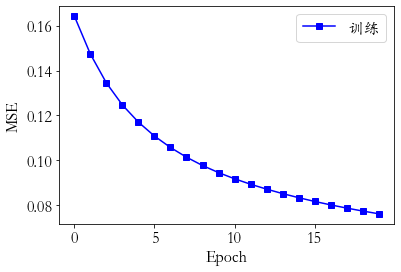

In [109]:
train(epochs=20)